<h1> Analysis of the Weather Data </h1>

In this notebook, we provide basic analysis on the number of days where the temperature was in between threshold. We have chosen the days from October 1st, 2022 to December 4th, 2022, since these are the days in which we were without gas.

The data was downloaded from [here](https://home.openweathermap.org/), and we selected the location to be 1133 Manhattan Av., Brooklyn, NY, 11222.

<h3>Minimum Temperature</h3>

In this section, we count the number of days among the range described above that the temperature was either below 55 degress, or between 55 and 65 degrees, or bigger than 55 degrees.


In [148]:
from datetime import datetime, timedelta
import pytz
import pandas as pd
import numpy as np

def k_to_f(t):
    return (t - 273.15) * 9/5 + 32

load = False
if load:
    df = pd.read_clipboard()

    df['dt_ny'] = df['dt'].apply(lambda row: datetime.fromtimestamp(row, tz=pytz.timezone('America/New_York')))
    for c in filter(lambda x: 'temp' in x, df.columns):
        df[f'{c}[F]'] = df[c].apply(k_to_f)

    day_begin = datetime(year=2022, month=10, day =1, tzinfo=pytz.timezone('America/New_York'))
    day_end = datetime(year=2022, month=12, day=4, tzinfo=pytz.timezone('America/New_York'))
    df = df[df['dt_ny'] >= day_begin]
    df = df[df['dt_ny'] < day_end]
df

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,dt_ny,temp[F],temp_min[F],temp_max[F]
771,1664600400,2022-10-01 05:00:00 +0000 UTC,-14400,1133 Manhattan Ave,40.737061,-73.95555,288.38,10000,283.58,287.86,...,NaN,75,300,Drizzle,light intensity drizzle,09n,2022-10-01 01:00:00-04:00,59.414,57.200,60.782
772,1664600400,2022-10-01 05:00:00 +0000 UTC,-14400,1133 Manhattan Ave,40.737061,-73.95555,288.38,10000,283.58,287.86,...,NaN,75,500,Rain,light rain,10n,2022-10-01 01:00:00-04:00,59.414,57.200,60.782
773,1664604000,2022-10-01 06:00:00 +0000 UTC,-14400,1133 Manhattan Ave,40.737061,-73.95555,288.13,10000,284.14,287.69,...,NaN,100,500,Rain,light rain,10n,2022-10-01 02:00:00-04:00,58.964,57.200,61.034
774,1664607600,2022-10-01 07:00:00 +0000 UTC,-14400,1133 Manhattan Ave,40.737061,-73.95555,287.46,10000,283.87,287.01,...,NaN,75,500,Rain,light rain,10n,2022-10-01 03:00:00-04:00,57.758,55.400,60.044
775,1664611200,2022-10-01 08:00:00 +0000 UTC,-14400,1133 Manhattan Ave,40.737061,-73.95555,287.56,10000,283.97,287.12,...,NaN,100,501,Rain,moderate rain,10n,2022-10-01 04:00:00-04:00,57.938,55.400,60.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,1670112000,2022-12-04 00:00:00 +0000 UTC,-18000,1133 Manhattan Ave,40.737061,-73.95555,286.31,10000,280.54,285.46,...,NaN,20,500,Rain,light rain,10n,2022-12-03 19:00:00-05:00,55.688,54.176,57.272
2434,1670115600,2022-12-04 01:00:00 +0000 UTC,-18000,1133 Manhattan Ave,40.737061,-73.95555,285.14,10000,277.63,283.96,...,NaN,20,801,Clouds,few clouds,02n,2022-12-03 20:00:00-05:00,53.582,51.332,55.076
2435,1670119200,2022-12-04 02:00:00 +0000 UTC,-18000,1133 Manhattan Ave,40.737061,-73.95555,282.94,10000,273.82,279.76,...,NaN,0,800,Clear,sky is clear,01n,2022-12-03 21:00:00-05:00,49.622,47.174,51.782
2436,1670122800,2022-12-04 03:00:00 +0000 UTC,-18000,1133 Manhattan Ave,40.737061,-73.95555,281.77,10000,272.32,277.97,...,NaN,0,800,Clear,sky is clear,01n,2022-12-03 22:00:00-05:00,47.516,46.328,48.272


In [149]:
column_to_use, threshold, upper_threshold = 'temp_min[F]', 55, 65

processed = set()
elements = []
for d in df['dt_ny'].unique():
    if (d.day, d.month) not in processed:

        day = datetime(year=2022, month=d.month, day=d.day, tzinfo=pytz.timezone('America/New_York'))
        mask = (df['dt_ny'] >= day) & (df['dt_ny'] < day + timedelta(days=1))
        local = df[mask]
        processed.add( (d.day, d.month) )
        elements.append({'day': day, column_to_use: local[column_to_use].min()})

labels = {f'lt_{threshold}': f'days where min. temperature is less than {threshold}',
          f'{threshold}_{upper_threshold}': f'days where min. temperature is between {threshold} and {upper_threshold}',
          f'gt_{upper_threshold}': f'days where min. temperature is greater than {upper_threshold}',
          'day': 'total number of days'
          }

min_temp = pd.DataFrame(elements)
min_temp[f'lt_{threshold}'] = min_temp[column_to_use].apply(lambda r: r if r <= threshold else np.nan)
min_temp[f'{threshold}_{upper_threshold}'] = min_temp[column_to_use].apply(lambda r: r if threshold < r <= upper_threshold else np.nan)
min_temp[f'gt_{upper_threshold}'] = min_temp[column_to_use].apply(lambda r: r if r > upper_threshold else np.nan)

pd.DataFrame({ labels[k]: v for k, v in min_temp.count().to_dict().items() if k in labels }, index=['count']).transpose()

,count
total number of days,64
days where min. temperature is less than 55,55
days where min. temperature is between 55 and 65,9
days where min. temperature is greater than 65,0


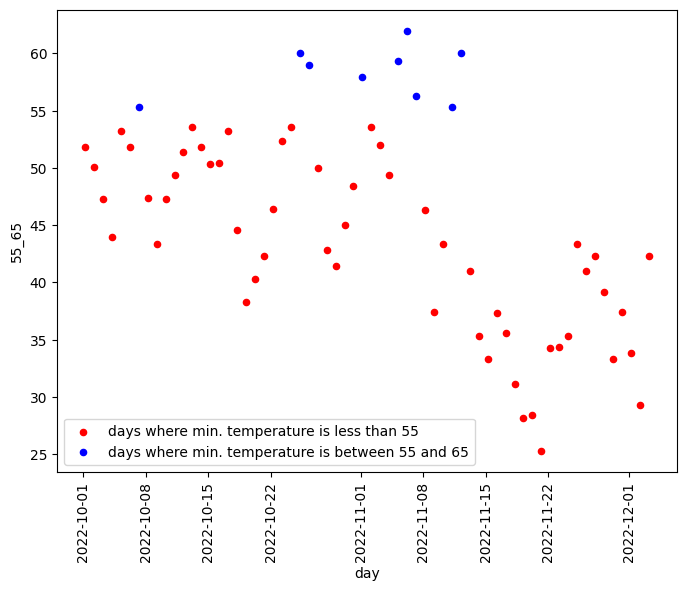

In [150]:
fig_size = (8, 6)
plots = [f'lt_{threshold}', f'{threshold}_{upper_threshold}' ]
ax = min_temp.plot(x='day', y=plots[0], kind='scatter', c='red', figsize=fig_size, label = labels[plots[0]], rot=90)

for p in plots[1:]:
    ax = min_temp.plot(x='day', y= p, kind='scatter', ax=ax, c='blue', figsize=fig_size, label=labels[p], rot=90)